<a href="https://colab.research.google.com/github/shahchayan9/LOW-CODE-AUTOML---Autogluon/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AutoMM for Semantic Segmentation - Quick Start

In [ ]:
!pip install autogluon.multimodal


In [ ]:
download_dir = './ag_automm_tutorial'
zip_file = 'https://automl-mm-bench.s3.amazonaws.com/semantic_segmentation/leaf_disease_segmentation.zip'
from autogluon.core.utils.loaders import load_zip
load_zip.unzip(zip_file, unzip_dir=download_dir)

100%|██████████| 53.3M/53.3M [00:03<00:00, 17.3MiB/s]


In [ ]:
import pandas as pd
import os
dataset_path = os.path.join(download_dir, 'leaf_disease_segmentation')
train_data = pd.read_csv(f'{dataset_path}/train.csv', index_col=0)
val_data = pd.read_csv(f'{dataset_path}/val.csv', index_col=0)
test_data = pd.read_csv(f'{dataset_path}/test.csv', index_col=0)
image_col = 'image'
label_col = 'label'

In [ ]:
def path_expander(path, base_folder):
    path_l = path.split(';')
    return ';'.join([os.path.abspath(os.path.join(base_folder, path)) for path in path_l])

for per_col in [image_col, label_col]:
    train_data[per_col] = train_data[per_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))
    val_data[per_col] = val_data[per_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))
    test_data[per_col] = test_data[per_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))


print(train_data[image_col].iloc[0])
print(train_data[label_col].iloc[0])

/content/ag_automm_tutorial/leaf_disease_segmentation/train_images/00002.jpg
/content/ag_automm_tutorial/leaf_disease_segmentation/train_masks/00002.png


In [ ]:
train_data.head()

,image,label
0,/content/ag_automm_tutorial/leaf_disease_segme...,/content/ag_automm_tutorial/leaf_disease_segme...
1,/content/ag_automm_tutorial/leaf_disease_segme...,/content/ag_automm_tutorial/leaf_disease_segme...
2,/content/ag_automm_tutorial/leaf_disease_segme...,/content/ag_automm_tutorial/leaf_disease_segme...
3,/content/ag_automm_tutorial/leaf_disease_segme...,/content/ag_automm_tutorial/leaf_disease_segme...
4,/content/ag_automm_tutorial/leaf_disease_segme...,/content/ag_automm_tutorial/leaf_disease_segme...


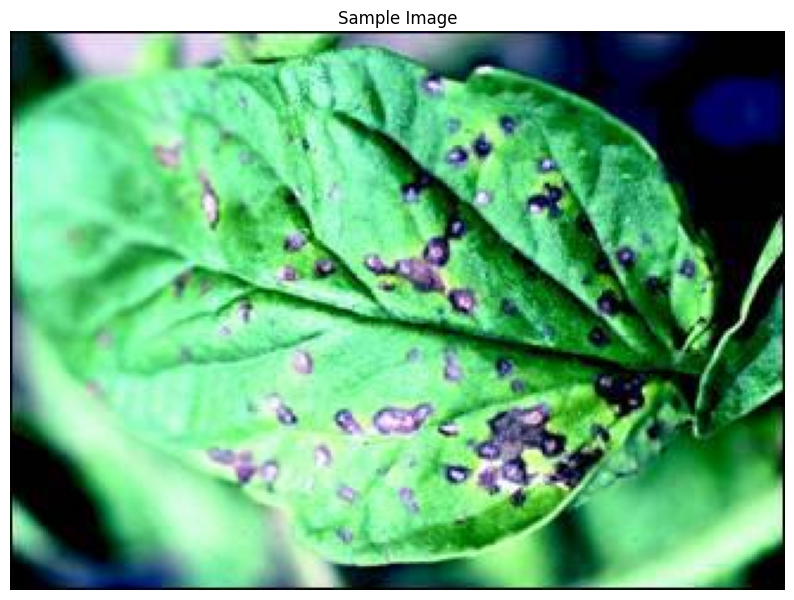

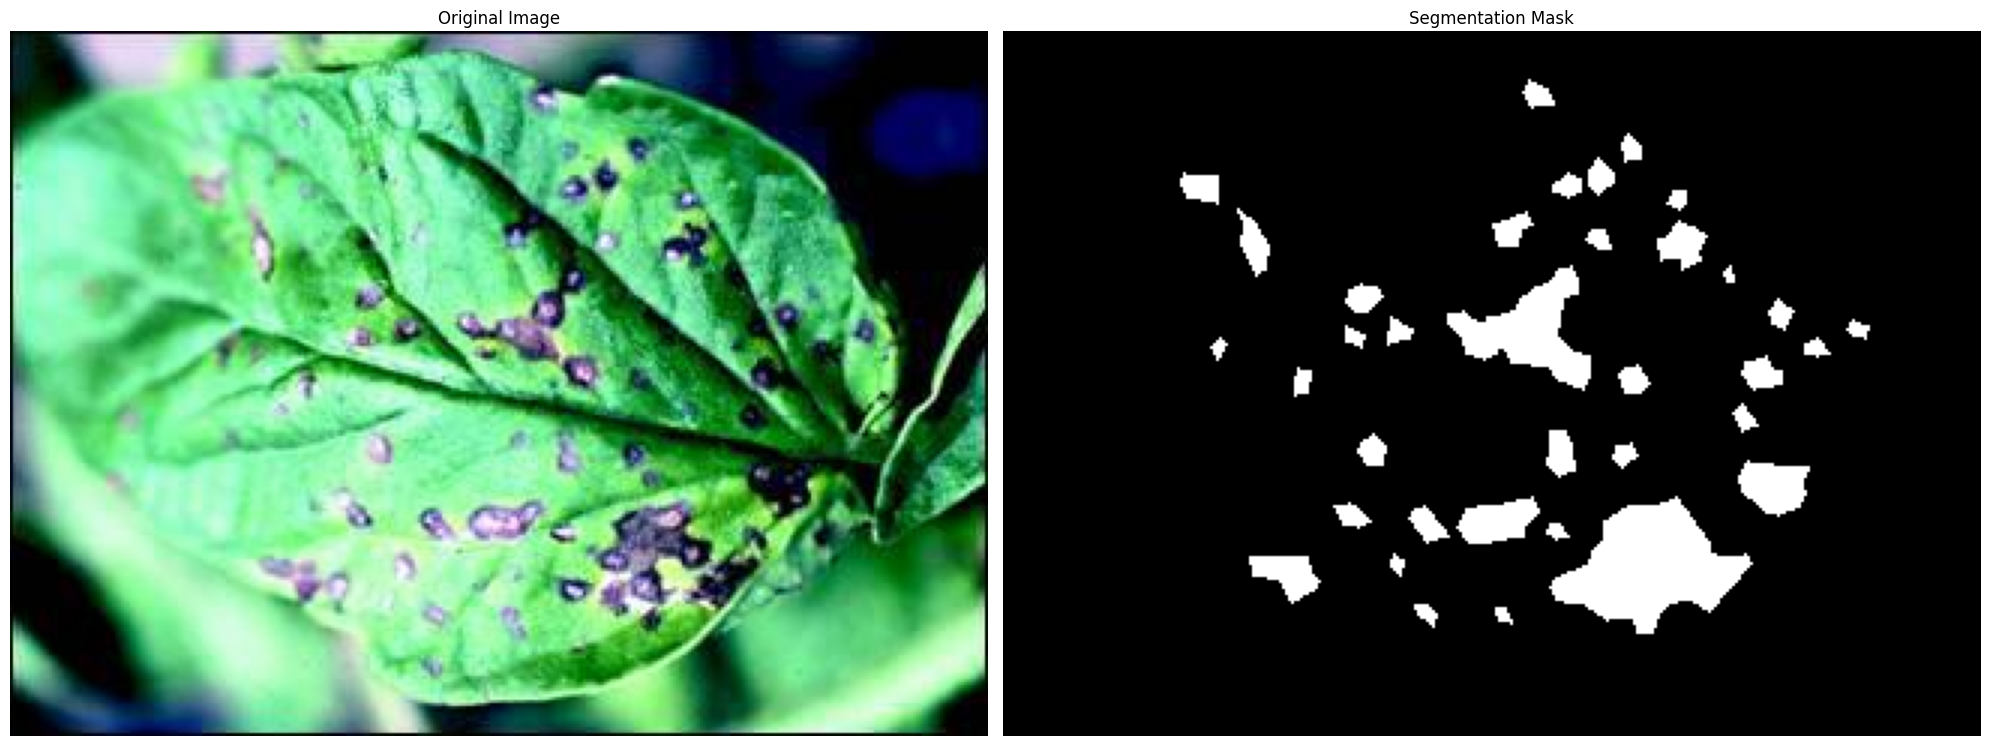

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def visualize_image(image_path):
    img = Image.open(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Sample Image')
    plt.show()

# Visualize the sample image
sample_image_path = test_data.iloc[0]['image']
visualize_image(sample_image_path)

# If you want to visualize the mask as well, you can use this function
def visualize_image_and_mask(image_path, mask_path):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    img = Image.open(image_path)
    mask = Image.open(mask_path)

    ax1.imshow(img)
    ax1.set_title('Original Image')
    ax1.axis('off')

    ax2.imshow(mask, cmap='gray')
    ax2.set_title('Segmentation Mask')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize both image and mask
sample_mask_path = test_data.iloc[0]['label']
visualize_image_and_mask(sample_image_path, sample_mask_path)

## Zero Shot Evaluation

In [ ]:
!pip uninstall -y torchaudio torch
!pip install torch==2.0.1 torchaudio==2.0.1
!pip install -U autogluon


Found existing installation: torch 2.3.1
Uninstalling torch-2.3.1:
  Successfully uninstalled torch-2.3.1
  Using cached torch-2.0.1-cp310-cp310-manylinux1_x86_64.whl.metadata (24 kB)
  Using cached torchaudio-2.0.1-cp310-cp310-manylinux1_x86_64.whl.metadata (1.2 kB)
  Using cached nvidia_cuda_nvrtc_cu11-11.7.99-2-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu11-11.7.99-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cuda_cupti_cu11-11.7.101-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu11-8.5.0.96-2-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu11-11.10.3.66-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cufft_cu11-10.9.0.58-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu11-10.2.10.91-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusolver_cu11-11.4.0.1-2-py3-none-manylinux1

In [ ]:
!pip install -U autogluon.multimodal


In [ ]:
from autogluon.multimodal import MultiModalPredictor

predictor_zero_shot = MultiModalPredictor(
    problem_type="semantic_segmentation",
    label=label_col,
    hyperparameters={
        "model.sam.checkpoint_name": "facebook/sam-vit-base",
    },
    num_classes=1  # forground-background segmentation
)

NameError: name 'label_col' is not defined

In [ ]:
pred_zero_shot = predictor_zero_shot.predict({'image': [test_data.iloc[0]['image']]})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/375M [00:00<?, ?B/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

In [ ]:
from autogluon.multimodal.utils import SemanticSegmentationVisualizer
visualizer = SemanticSegmentationVisualizer()


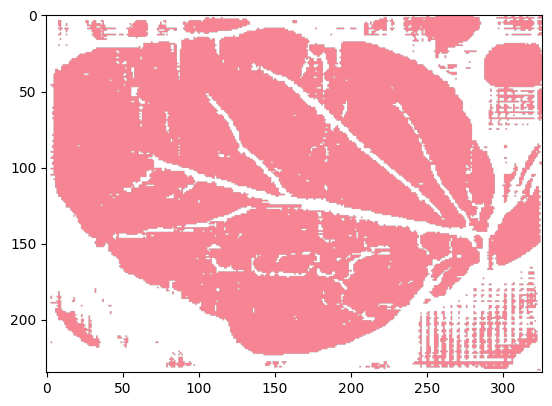

In [ ]:
visualizer.plot_mask(pred_zero_shot)

In [ ]:
scores = predictor_zero_shot.evaluate(test_data, metrics=["iou"])
print(scores)

Predicting: |          | 0/? [00:00<?, ?it/s]

{'iou': 0.14014999568462372}


## Finetune SAM

In [ ]:
from autogluon.multimodal import MultiModalPredictor
import uuid
save_path = f"./tmp/{uuid.uuid4().hex}-automm_semantic_seg"
predictor = MultiModalPredictor(
    problem_type="semantic_segmentation",
    label="label",
     hyperparameters={
            "model.sam.checkpoint_name": "facebook/sam-vit-base",
        },
    path=save_path,
)
predictor.fit(
    train_data=train_data,
    tuning_data=val_data,
    time_limit=180, # seconds
)

=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Pytorch Version:    2.3.1+cu121
CUDA Version:       CUDA is not available
Memory Avail:       9.14 GB / 12.67 GB (72.1%)
Disk Space Avail:   55.67 GB / 107.72 GB (51.7%)

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir /content/tmp/5df9df46b2ed454d9bec9bdccf2bf1bf-automm_semantic_seg
    ```

INFO: Seed set to 0
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Training: |          | 0/? [00:00<?, ?it/s]

INFO: Time limit reached. Elapsed time is 0:04:14. Signaling Trainer to stop.


Validation: |          | 0/? [00:00<?, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/tmp/5df9df46b2ed454d9bec9bdccf2bf1bf-automm_semantic_seg")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [ ]:
scores = predictor.evaluate(test_data, metrics=["iou"])
print(scores)

Predicting: |          | 0/? [00:00<?, ?it/s]

{'iou': 0.14014999568462372}


In [ ]:
pred = predictor.predict({'image': [test_data.iloc[0]['image']]})

Predicting: |          | 0/? [00:00<?, ?it/s]

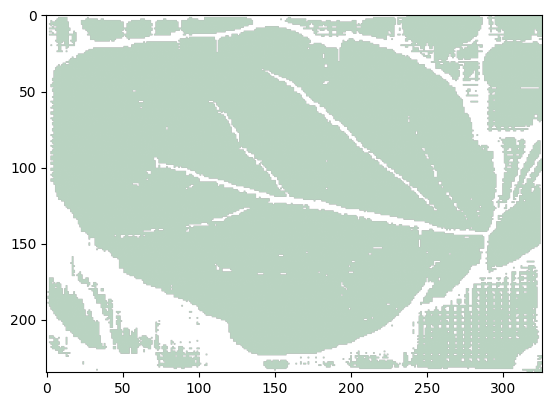

In [ ]:
visualizer.plot_mask(pred)